In [2]:
!git clone https://git.dcs.gla.ac.uk/SebastianStein/virl.git

Cloning into 'virl'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 47 (delta 15), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (47/47), done.


In [1]:
!pip install q keras==2.2.4
!pip install tensorflow==1.14
import tensorflow as tf
import keras
print(tf.__version__)
print(keras.__version__)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

1.14.0
2.2.4


/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [2]:
%cd /content/virl/virl


/content/virl/virl


In [3]:
import gym

import os
os.chdir('..')
from matplotlib import pyplot as plt
import numpy as np

import virl
env = virl.Epidemic(stochastic=False, noisy=False)

In [4]:
%cd /content


/content


In [5]:
import run_deterministic as agent_d
%cd /content
import run_random as agent_r
%cd /content
import run_policysearch as agent_p
%cd /content
import run_rbf as agent_f
%cd /content
import run_qtable as agent_q

/content
/content
/content
/content


**Deterministic Agent**

total reward -1.6811867446144855


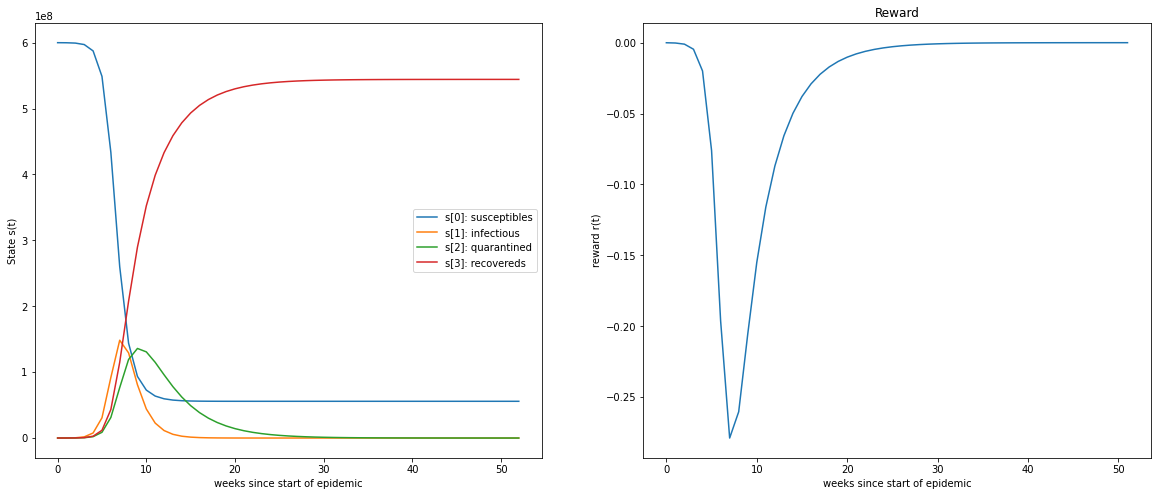

In [19]:
s,r = agent_d.deterministic_agent(0, env)
agent_d.graphs(s,r)

total reward -1.6336942500717837


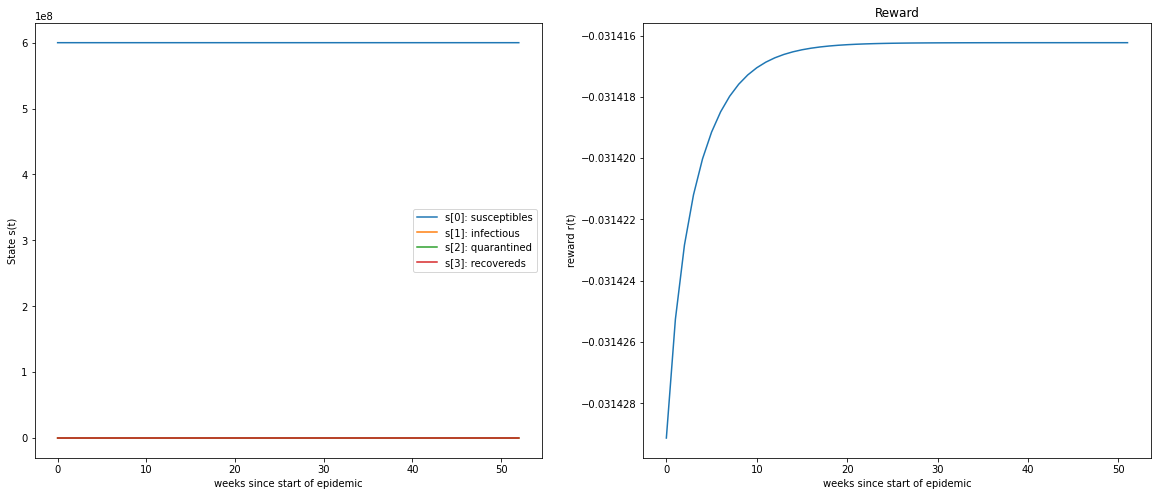

In [20]:
s,r = agent_d.deterministic_agent(1, env)
agent_d.graphs(s,r)

total reward -1.284974326755993


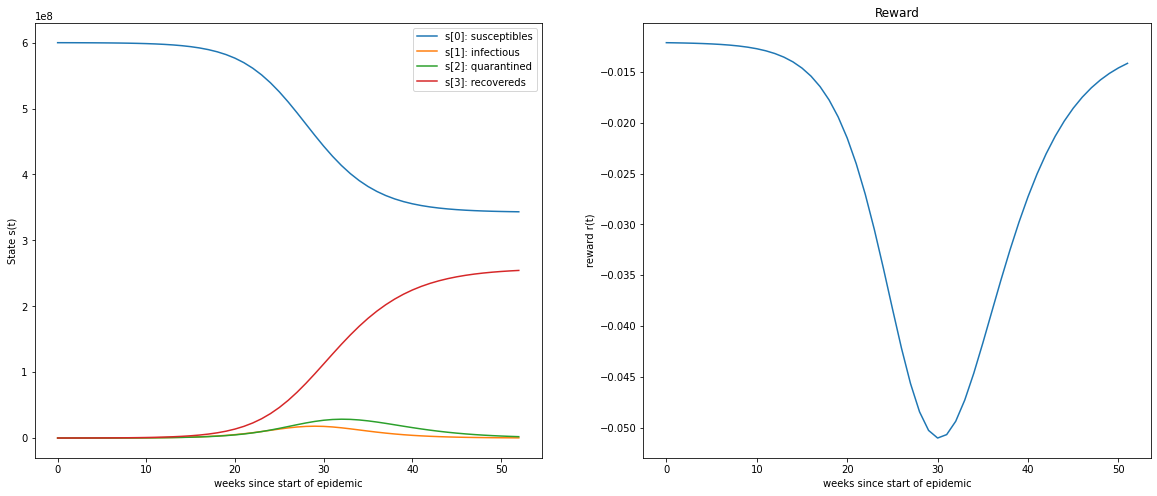

In [13]:
s,r = agent_d.deterministic_agent(2, env)
agent_d.graphs(s,r)

total reward -1.554262516767732


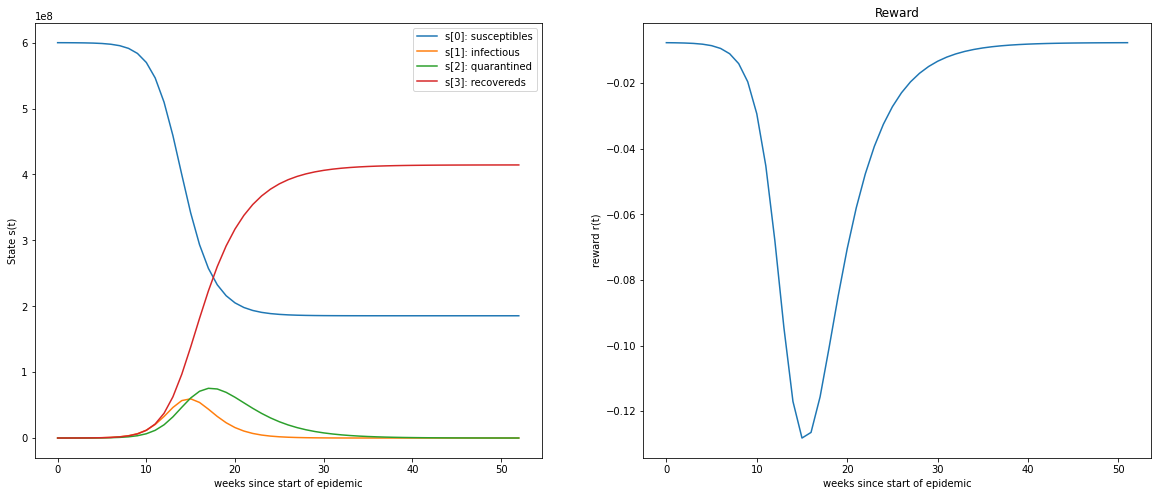

In [12]:
s,r = agent_d.deterministic_agent(3, env)
agent_d.graphs(s,r)

In [82]:
for action in range(4):
  print("Deterministic Agent Using Action " + str(action))
  print("ProblemID  |        ST0N0        |        ST1N0        |        ST0N1        |        ST1N1        ")
  print("___________________________________________________________________________________________________")
  for i in range(10):
    test_env = virl.Epidemic(stochastic=False, noisy=False,problem_id=i)
    s0,r0 = agent_d.deterministic_agent(action, test_env)
    test_env = virl.Epidemic(stochastic=True, noisy=False,problem_id=i)
    s1,r1 = agent_d.deterministic_agent(action, test_env)
    test_env = virl.Epidemic(stochastic=False, noisy=True,problem_id=i)
    s2,r2 = agent_d.deterministic_agent(action, test_env)
    test_env = virl.Epidemic(stochastic=True, noisy=True,problem_id=i)
    s3,r3 = agent_d.deterministic_agent(action, test_env)
    print(str(i) + "          | " + str(sum(r0)) + " | "+ str(sum(r1)) + " | "+ str(sum(r2)) + " | "+ str(sum(r3)) + " |")
  print("\n")

Deterministic Agent Using Action 0
ProblemID  |        ST0N0        |        ST1N0        |        ST0N1        |        ST1N1        
___________________________________________________________________________________________________
0          | -1.6811867446144855 | -1.6559308167539233 | -1.6811867446144855 | -1.7103523060002184 |
1          | -0.8332845032786539 | -1.8144828448236594 | -0.8332845032786539 | -1.9128392318874088 |
2          | -1.1755350586264501 | -1.9438408193422503 | -1.1755350586264501 | -1.2285832926422657 |
3          | -1.406400866340364 | -1.226835882703713 | -1.406400866340364 | -1.3512496049767067 |
4          | -1.5668924670149622 | -1.6689123327066737 | -1.5668924670149622 | -1.9242176002962663 |
5          | -1.781515463688663 | -1.9535108432937405 | -1.781515463688663 | -1.2307019085718787 |
6          | -1.8389731412055614 | -1.1552339427383043 | -1.8389731412055614 | -1.7466277180223992 |
7          | -1.8825637108287268 | -1.9219594454878188 | -1.882

**__Random Agent__**

total reward -1.612390635627195


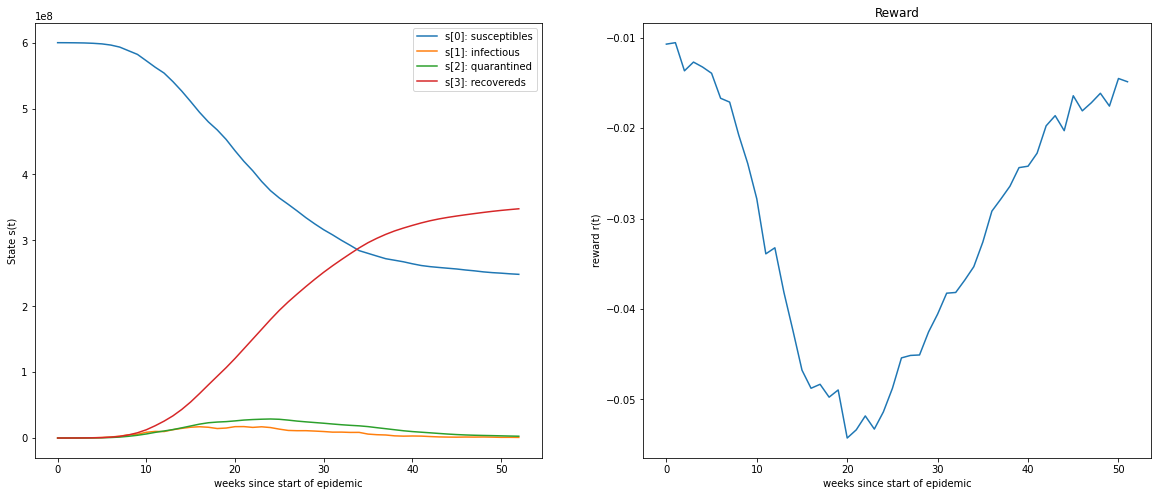

In [ ]:
test_env = virl.Epidemic(stochastic=False, noisy=False,)
s,r = agent_r.random_agent(100,test_env)
agent_r.graphs(s,r)

total reward -1.9404664003539907


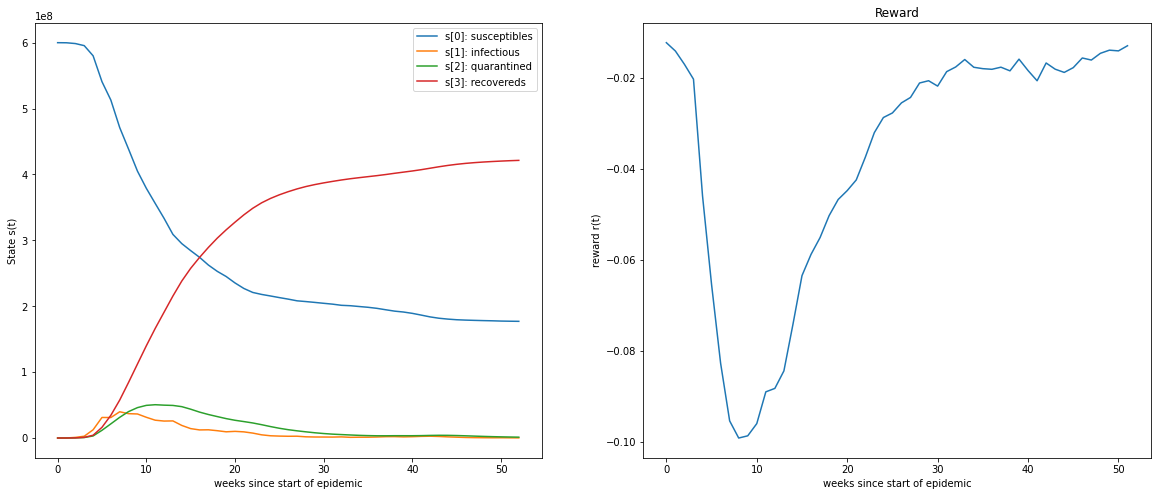

In [ ]:
test_env = virl.Epidemic(stochastic=True, noisy=False)
s,r = agent_r.random_agent(100,test_env)
agent_r.graphs(s,r)

total reward -1.621864349902824


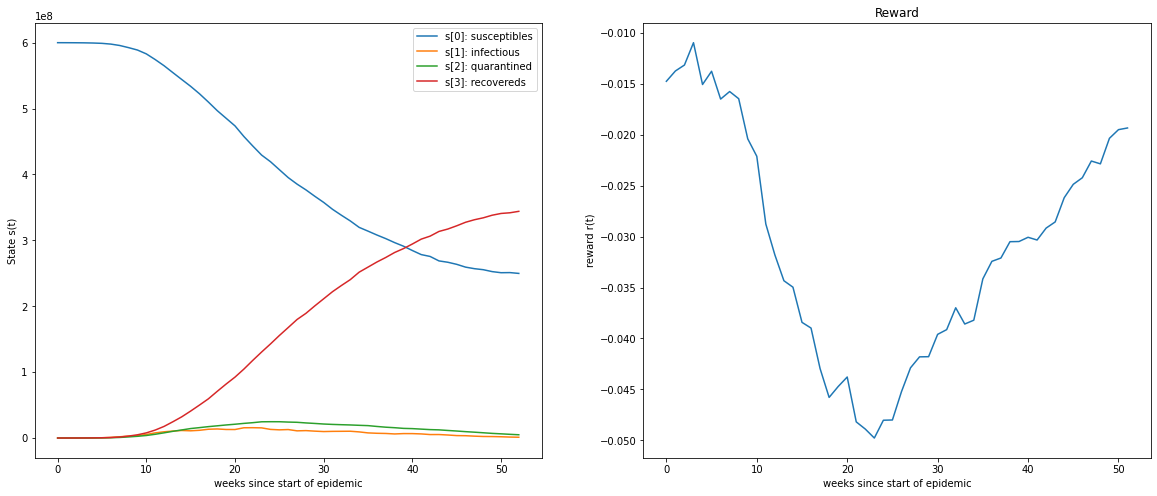

In [ ]:
test_env = virl.Epidemic(stochastic=False, noisy=True)
s,r = agent_r.random_agent(100,test_env)
agent_r.graphs(s,r)

total reward -1.9370602580818768


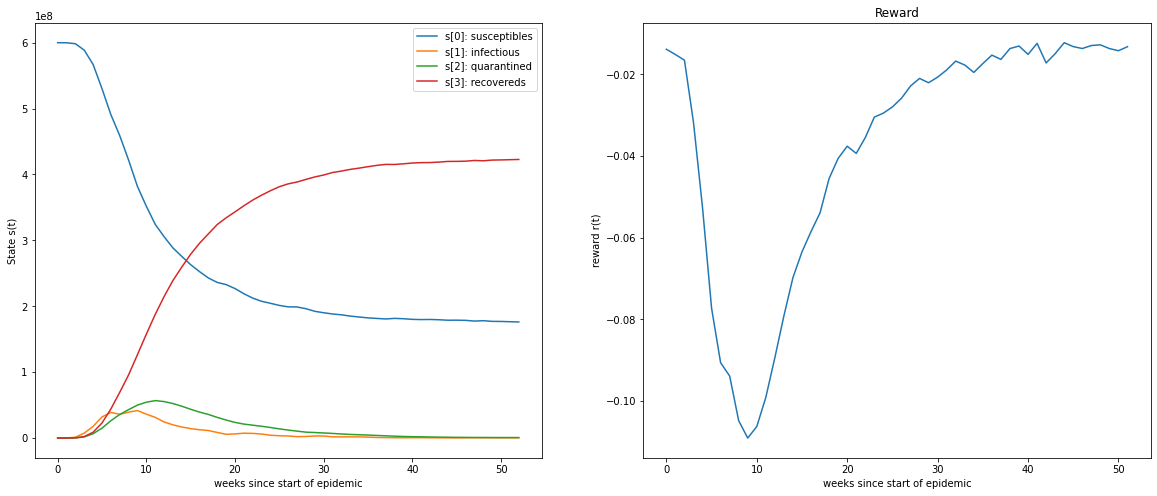

In [ ]:
test_env = virl.Epidemic(stochastic=True, noisy=True)
s,r = agent_r.random_agent(100,test_env)
agent_r.graphs(s,r)

In [83]:
print("Random Agent Using 100 Runs")
print("ProblemID  |        ST0N0        |        ST1N0        |        ST0N1        |        ST1N1        ")
print("___________________________________________________________________________________________________")
for i in range(10):
  test_env = virl.Epidemic(stochastic=False, noisy=False,problem_id=i)
  s0,r0 = agent_r.random_agent(100,test_env)
  test_env = virl.Epidemic(stochastic=True, noisy=False,problem_id=i)
  s1,r1 = agent_r.random_agent(100,test_env)
  test_env = virl.Epidemic(stochastic=False, noisy=True,problem_id=i)
  s2,r2 = agent_r.random_agent(100,test_env)
  test_env = virl.Epidemic(stochastic=True, noisy=True,problem_id=i)
  s3,r3 = agent_r.random_agent(100,test_env)
  print(str(i) + "          | " + str(sum(r0)) + " | "+ str(sum(r1)) + " | "+ str(sum(r2)) + " | "+ str(sum(r3)) + " |")
print("\n")


Random Agent Using 100 Runs
ProblemID  |        ST0N0        |        ST1N0        |        ST0N1        |        ST1N1        
___________________________________________________________________________________________________
0          | -1.6105257880585584 | -1.7338044192471327 | -1.6801396932291977 | -1.8554749115201379 |
1          | -0.6673022249024145 | -1.8030786411616733 | -0.6707711510436901 | -1.9399149484827427 |
2          | -0.6815651654482859 | -1.833685769596079 | -0.6685094295651424 | -1.8003961927311185 |
3          | -0.8627785470793361 | -1.7820132693739474 | -0.8269142689194146 | -1.9584716094868206 |
4          | -1.2775633959573605 | -1.9978758409579178 | -1.2933427398361175 | -1.803337864018433 |
5          | -1.9338994603061135 | -1.836282200381072 | -1.8711084549384438 | -2.0001311135204616 |
6          | -2.026209800466079 | -1.8874354735924967 | -2.0499977946122807 | -1.8674121277458682 |
7          | -2.094594684862112 | -1.8226842445933573 | -2.1536535023

**Policy Search**

In [74]:
def avg_random_p(iterations, env):
  cumulative_s = []
  cumulative_r = []
  total_s=np.zeros(53*4)
  total_s.shape = (53,4)

  total_r=np.zeros(52)
  total_r.shape = (52)

  for i in range(iterations):
    s,r = agent_p.runpolicy(test_env)
    cumulative_s.append(s)
    cumulative_r.append(r)

  for i in range(iterations):
    total_s = np.add(total_s,cumulative_s[i])
    total_r = np.add(total_r,cumulative_r[i])
 
  res_s = np.array(total_s)/iterations
  res_r = np.array(total_r)/iterations
  return res_s,res_r






Step 51 @ Episode 1000/1000 (-0.9808190088402896)

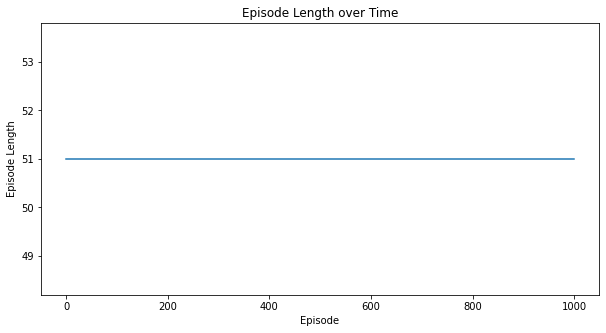

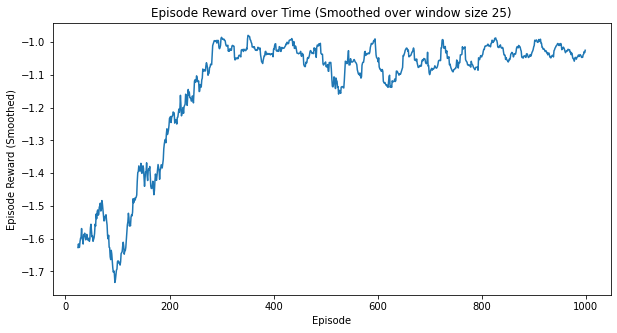

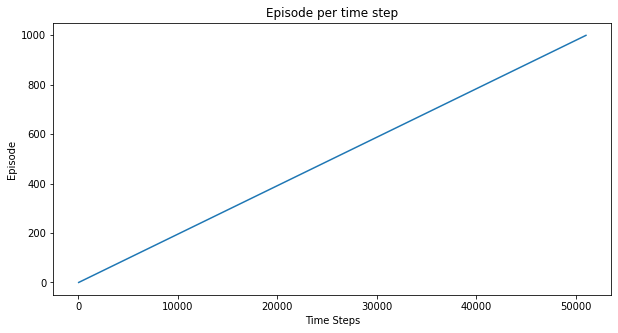

total reward -1.044217953219334


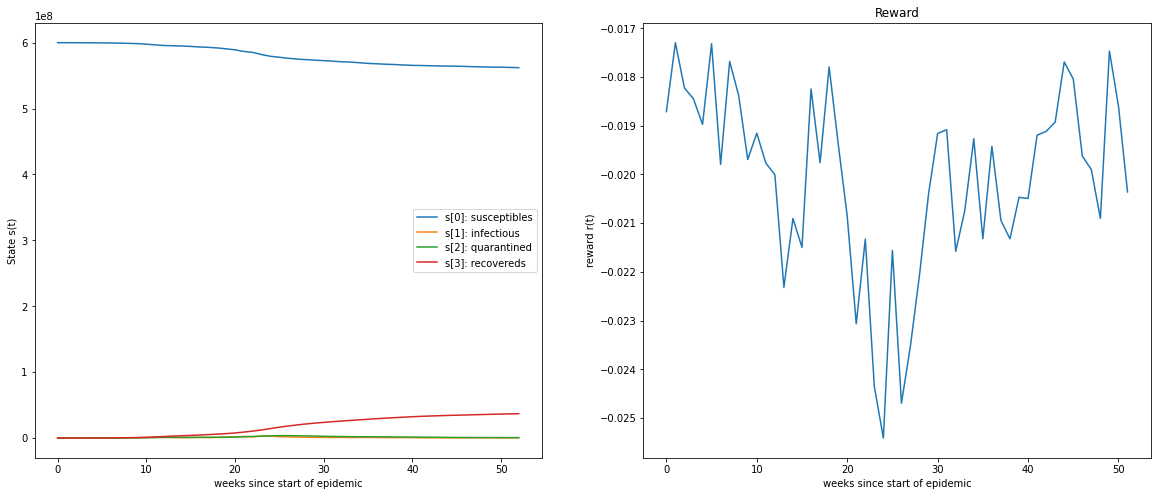

In [76]:
env = virl.Epidemic(stochastic=False, noisy=False)
agent_p.policy_execute(env, alpha = 0.001, discount_factor=0.99, episodes_number = 1000, list_of_vals = [3,3,3,3])
test_env = virl.Epidemic(stochastic=False, noisy=False)
#s,r = agent_p.runpolicy(test_env)
#s,r = avg_random(100,agent_p.runpolicy(test_env))
#agent_p.graphs(s,r)
res,rer = avg_random_p(100,test_env)
agent_p.graphs(res,rer)

Step 51 @ Episode 1000/1000 (-1.0297817412000112)

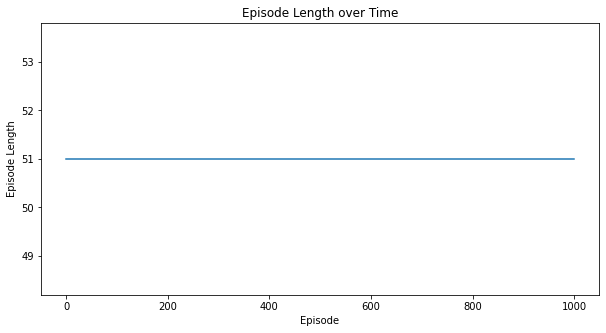

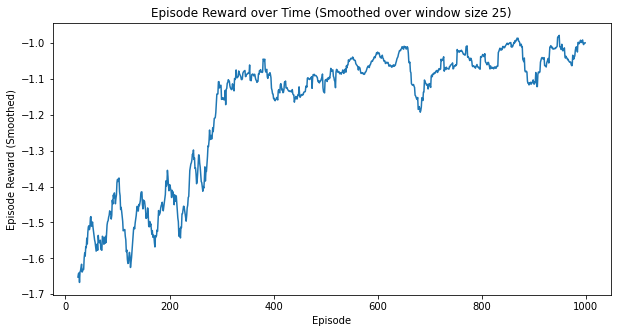

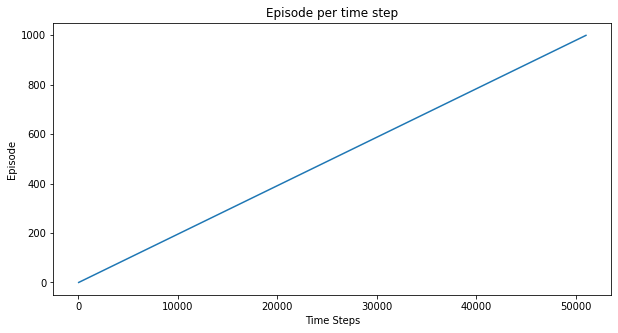

total reward -1.0595229376883555


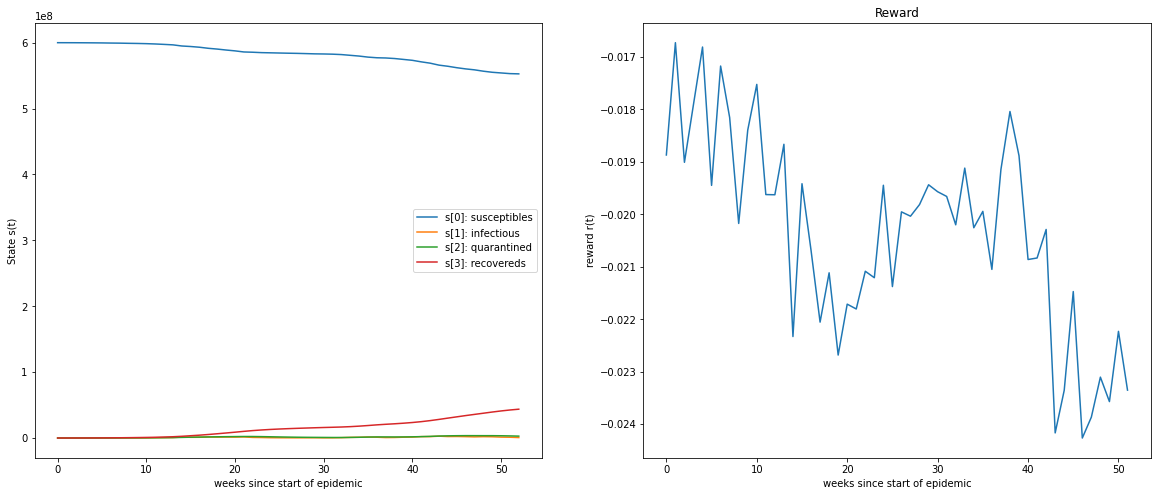

In [77]:
env = virl.Epidemic(stochastic=False, noisy=False)
agent_p.policy_execute(env, alpha = 0.001, discount_factor=0.99, episodes_number = 1000, list_of_vals = [6,50,50,6])
test_env = virl.Epidemic(stochastic=False, noisy=False)
res,rer = avg_random_p(100,test_env)
agent_p.graphs(res,rer)

total reward -1.680425683823628


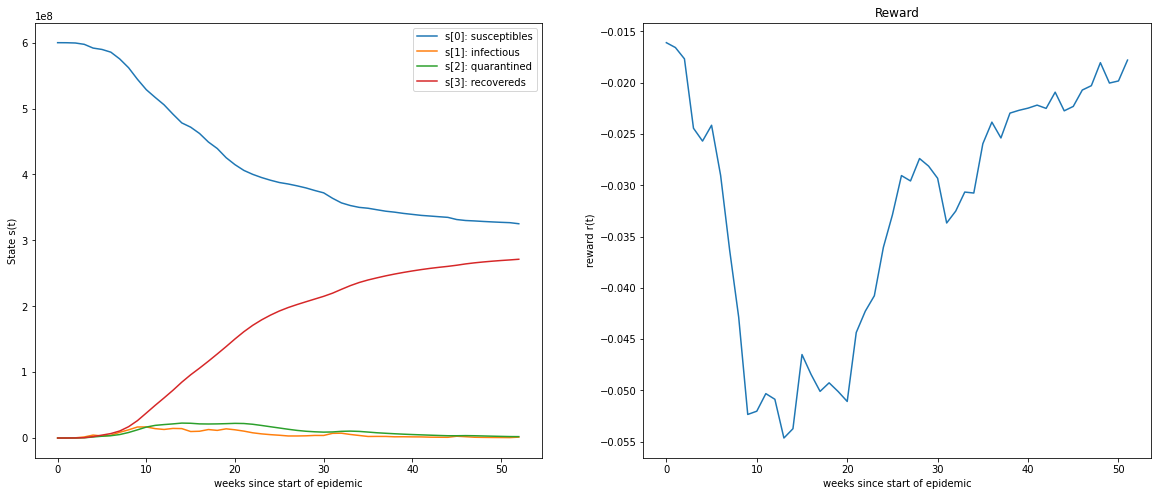

In [ ]:

test_env = virl.Epidemic(stochastic=True, noisy=False)
res,rer = avg_random_p(100,test_env)
agent_p.graphs(res,rer)

total reward -0.9797243653234258


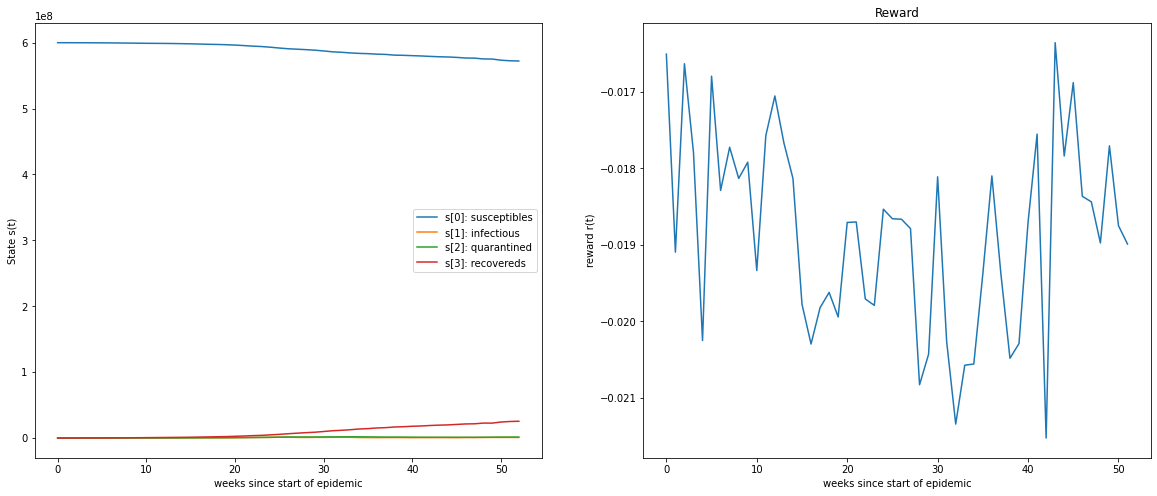

In [ ]:
test_env = virl.Epidemic(stochastic=False, noisy=True)
res,rer = avg_random_p(100,test_env)
agent_p.graphs(res,rer)

total reward -1.787512828836851


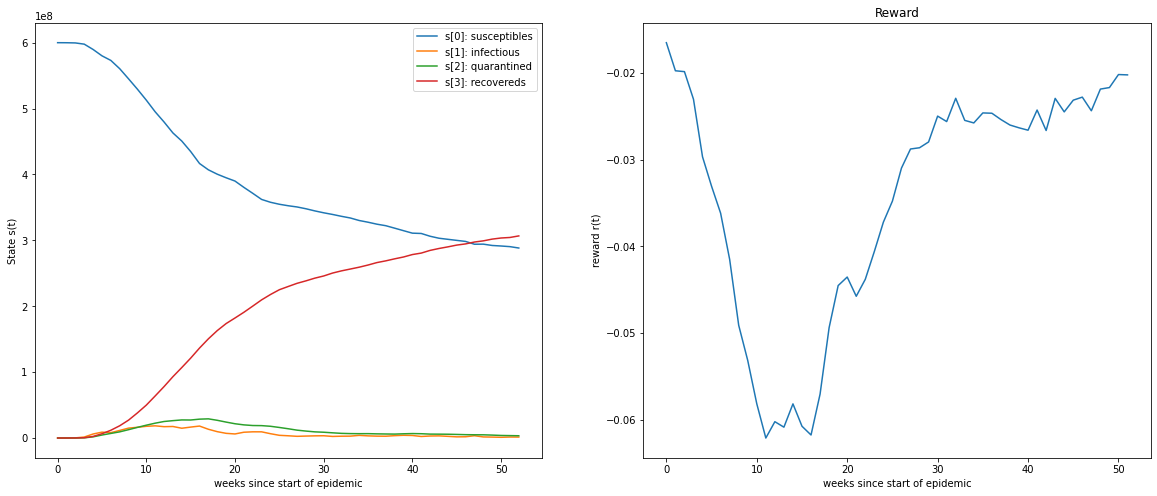

In [ ]:
test_env = virl.Epidemic(stochastic=True, noisy=True)
res,rer = avg_random_p(100,test_env)
agent_p.graphs(res,rer)

In [85]:
print("Policy Search Using 100 Runs")
print("ProblemID  |        ST0N0        |        ST1N0        |        ST0N1        |        ST1N1        ")
print("___________________________________________________________________________________________________")
for i in range(10):
  test_env = virl.Epidemic(stochastic=False, noisy=False,problem_id=i)
  s0,r0 = avg_random_p(100,test_env)
  test_env = virl.Epidemic(stochastic=True, noisy=False,problem_id=i)
  s1,r1 = avg_random_p(100,test_env)
  test_env = virl.Epidemic(stochastic=False, noisy=True,problem_id=i)
  res,r2 = avg_random_p(100,test_env)
  test_env = virl.Epidemic(stochastic=True, noisy=True,problem_id=i)
  res,r3 = avg_random_p(100,test_env)
  print(str(i) + "          | " + str(sum(r0)) + " | "+ str(sum(r1)) + " | "+ str(sum(r2)) + " | "+ str(sum(r3)) + " |")
print("\n")

Policy Search Using 100 Runs
ProblemID  |        ST0N0        |        ST1N0        |        ST0N1        |        ST1N1        
___________________________________________________________________________________________________
0          | -1.0421704573894643 | -1.743399803925904 | -1.0496307287335518 | -1.7917371156589041 |
1          | -0.9591064938781706 | -1.6288669205908437 | -0.9472514881389063 | -1.5632010675589227 |
2          | -0.9427770540845904 | -1.6932207953921992 | -0.9448909666059827 | -1.841544847468478 |
3          | -0.9408891858336852 | -1.7206162671395424 | -0.9420536862857806 | -1.7474368246994056 |
4          | -0.9442439029179123 | -1.7933994291388564 | -0.954618667862414 | -1.7755186835867491 |
5          | -1.3381450595402036 | -1.8142910001259092 | -1.2690936028016389 | -1.8200362817410753 |
6          | -1.6971241317234729 | -1.81665850038055 | -1.7088936063236584 | -1.8360719930458362 |
7          | -1.8542255716587843 | -1.7665612745662784 | -1.909091550

**Q-Table**

total reward -1.389577150705136


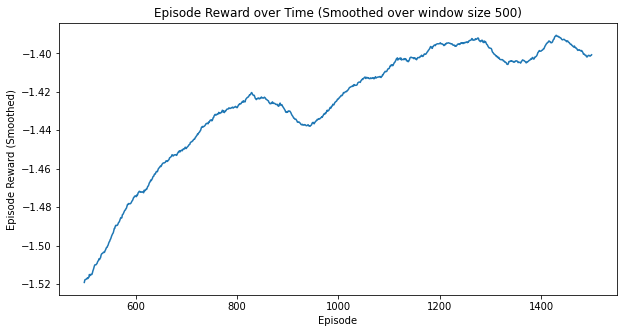

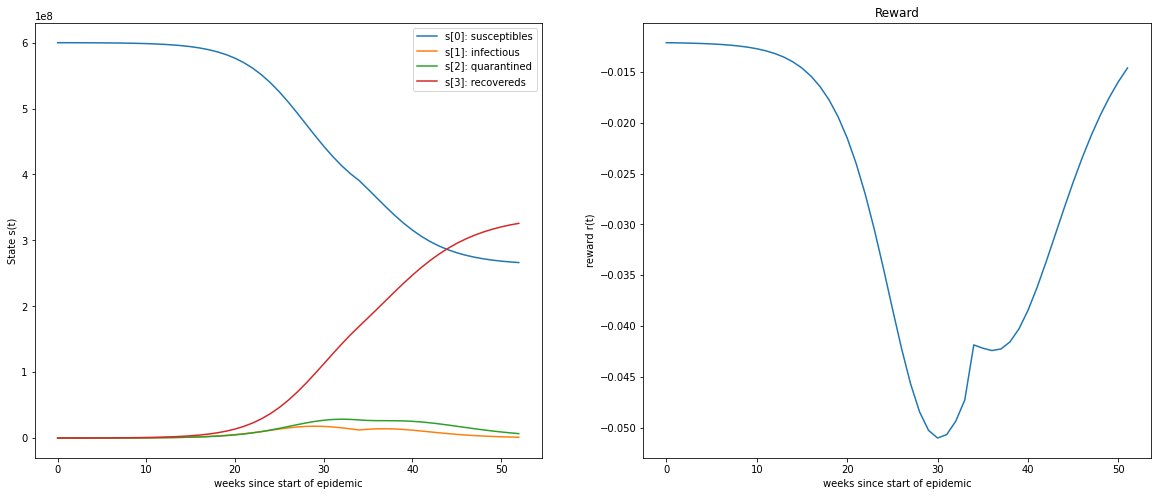

In [ ]:
q_table = agent_q.qtable(env,num_episodes=1500,list_of_vals=[3,3,3,3])
test_env = virl.Epidemic(stochastic=False, noisy=False)

s,r = agent_q.run(q_table, test_env)
agent_q.graphs(s,r)

total reward -1.5728240433015104


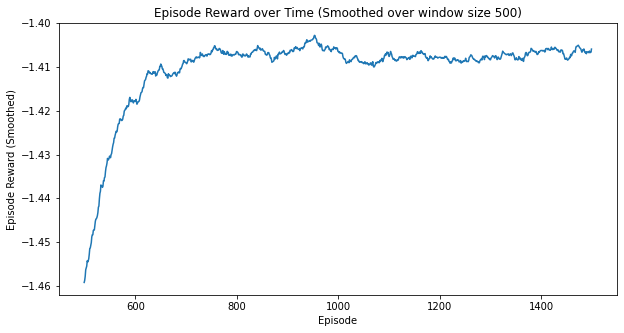

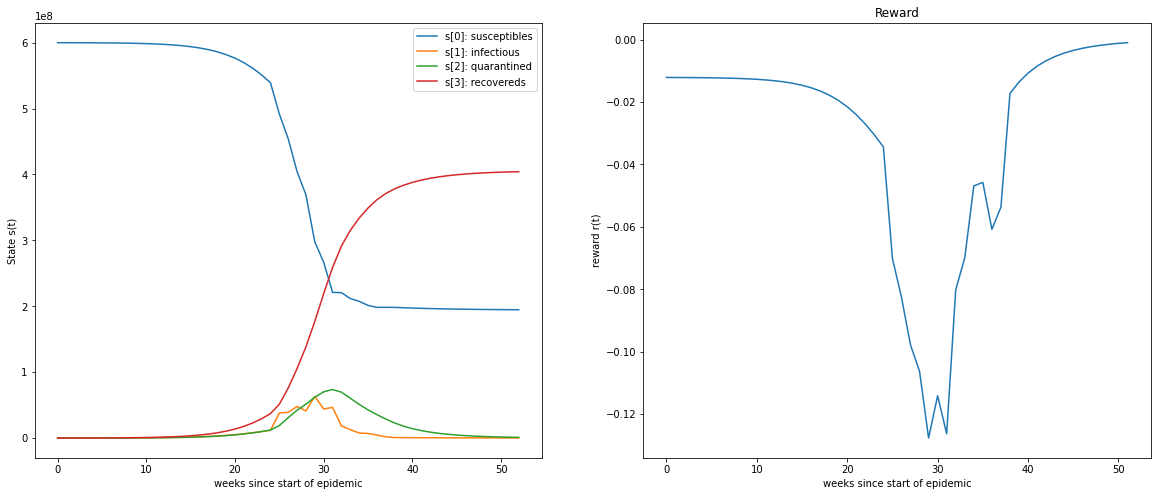

In [80]:
q_table = agent_q.qtable(env,num_episodes=1500,list_of_vals=[6,50,50,6])
test_env = virl.Epidemic(stochastic=False, noisy=False)

s,r = agent_q.run(q_table, test_env)
agent_q.graphs(s,r)

total reward -1.0538371214786746


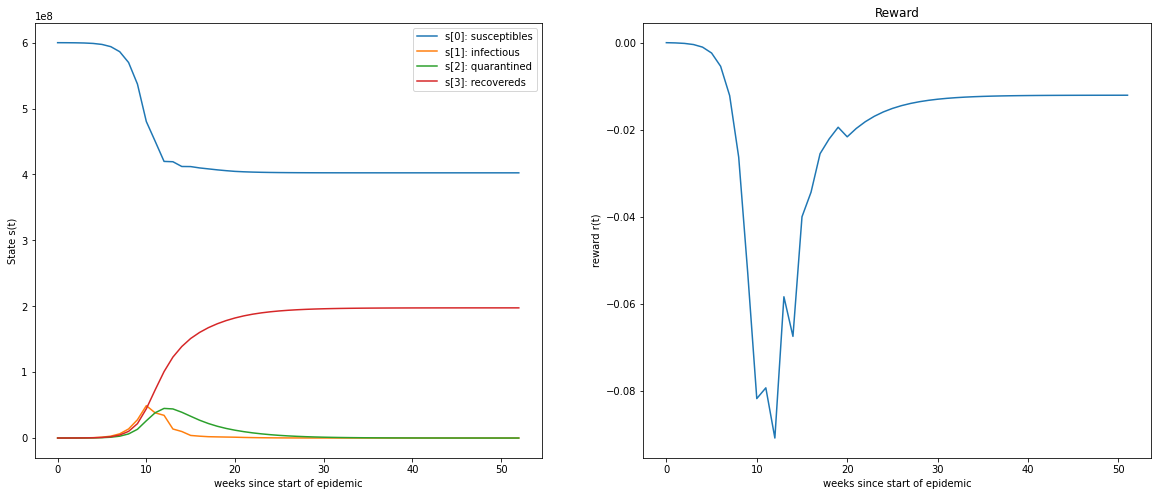

In [ ]:
test_env = virl.Epidemic(stochastic=True, noisy=False)
s,r = agent_q.run(q_table, test_env)
agent_q.graphs(s,r)

total reward -1.3816479585633268


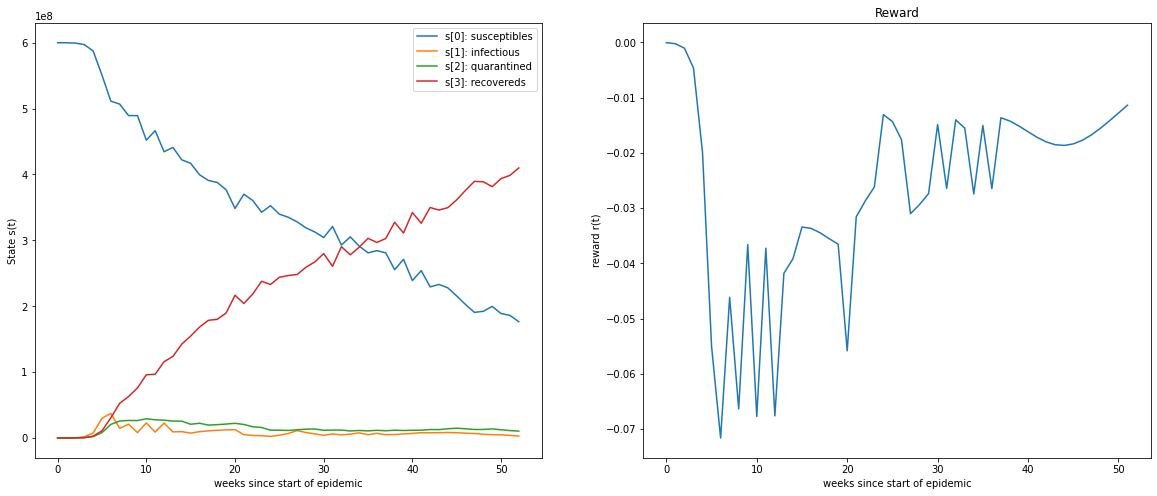

In [ ]:
test_env = virl.Epidemic(stochastic=False, noisy=True)
s,r = agent_q.run(q_table, test_env)
agent_q.graphs(s,r)

total reward -2.0448656586852634


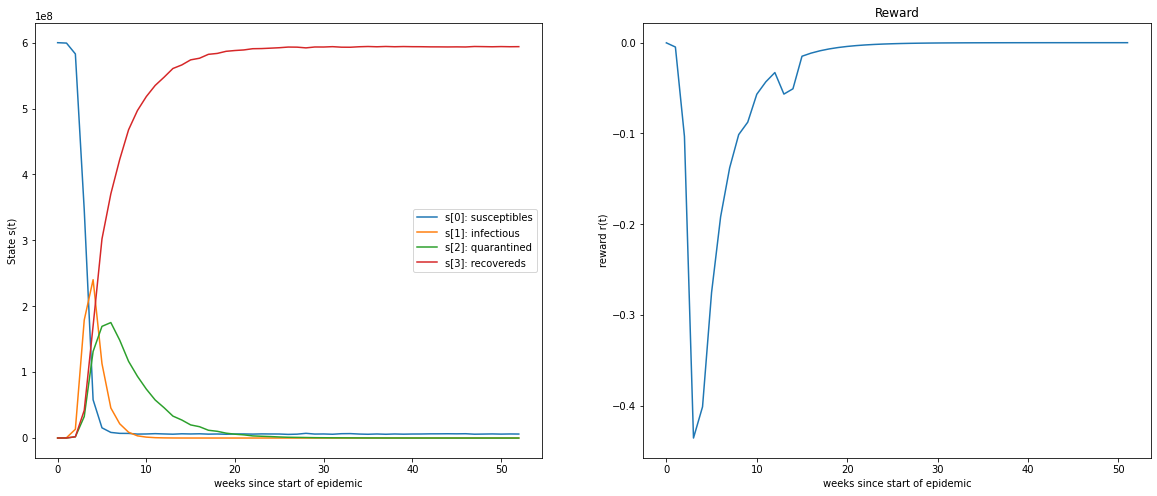

In [ ]:
test_env = virl.Epidemic(stochastic=True, noisy=True)
s,r = agent_q.run(q_table, test_env)
agent_q.graphs(s,r)

In [86]:
print("Q-Table")
print("ProblemID  |        ST0N0        |        ST1N0        |        ST0N1        |        ST1N1        ")
print("___________________________________________________________________________________________________")
for i in range(10):
  test_env = virl.Epidemic(stochastic=False, noisy=False,problem_id=i)
  s,r0 = agent_q.run(q_table, test_env)
  test_env = virl.Epidemic(stochastic=True, noisy=False,problem_id=i)
  s,r1 = agent_q.run(q_table, test_env)
  test_env = virl.Epidemic(stochastic=False, noisy=True,problem_id=i)
  s,r2 = agent_q.run(q_table, test_env)
  test_env = virl.Epidemic(stochastic=True, noisy=True,problem_id=i)
  s,r3 = agent_q.run(q_table, test_env)
  print(str(i) + "          | " + str(sum(r0)) + " | "+ str(sum(r1)) + " | "+ str(sum(r2)) + " | "+ str(sum(r3)) + " |")
print("\n")


Q-Table
ProblemID  |        ST0N0        |        ST1N0        |        ST0N1        |        ST1N1        
___________________________________________________________________________________________________
0          | -1.5728240433015102 | -2.0731143903196565 | -1.4317628217767957 | -2.1049490397333463 |
1          | -0.6291999801501305 | -1.6467235828572564 | -0.6291999801501305 | -1.5735007133576553 |
2          | -0.6293770338129265 | -0.630450814211939 | -0.6293770338129265 | -0.6292633763468568 |
3          | -0.6317200225475975 | -2.056605275897963 | -0.6317200225475975 | -1.6560600875314049 |
4          | -0.8339073413311735 | -2.0484651962673635 | -0.8339073413311735 | -1.5310228576348217 |
5          | -1.6390264373381247 | -2.106118329094821 | -1.5702067853457309 | -2.057634405392546 |
6          | -1.953922809958485 | -1.1375896713543834 | -1.578168071772983 | -2.115048127373403 |
7          | -1.7820617486728876 | -2.0939730482766077 | -2.0552602126382977 | -1.5808817082

**Q-Learning with RBF Function Approximation**

In [87]:
def avg_random_rbf(iterations, env):
  cumulative_s = []
  cumulative_r = []
  total_s=np.zeros(53*4)
  total_s.shape = (53,4)

  total_r=np.zeros(52)
  total_r.shape = (52)

  for i in range(iterations):
    s,r = agent_f.run_rbfpolicy(env)
    cumulative_s.append(s)
    cumulative_r.append(r)

  for i in range(iterations):
    total_s = np.add(total_s,cumulative_s[i])
    total_r = np.add(total_r,cumulative_r[i])
 
  res_s = np.array(total_s)/iterations
  res_r = np.array(total_r)/iterations
  return res_s,res_r

optimal
optimal
optimal
optimal
Step 51 @ Episode 1000/1000 (-1.234815685253292)

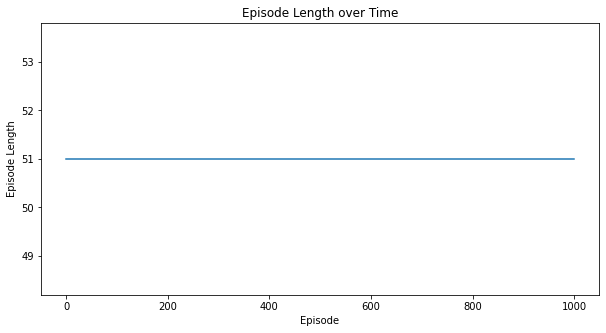

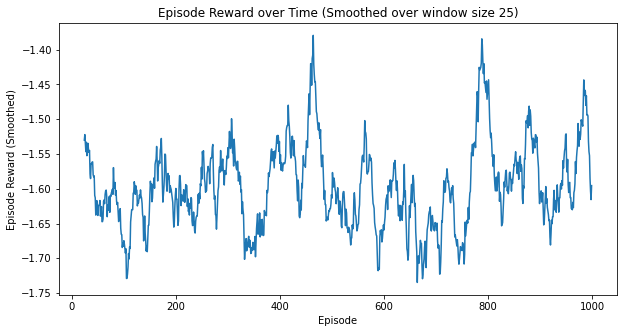

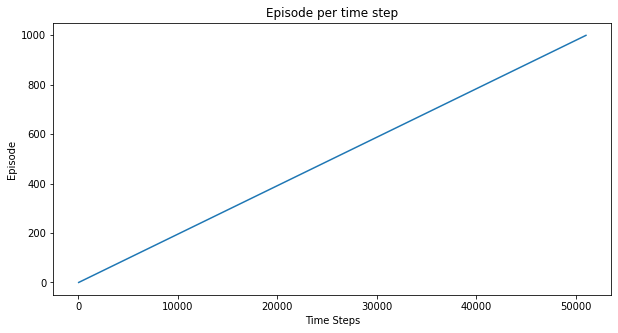

Step 51

([array([5.9996e+08, 2.0000e+04, 0.0000e+00, 2.0000e+04]),
  array([5.99959431e+08, 8.12407509e+03, 5.40646789e+03, 2.70382541e+04]),
  array([5.99959200e+08, 3.30002971e+03, 6.39636599e+03, 3.11034487e+04]),
  array([5.99959106e+08, 1.34048441e+03, 5.86135702e+03, 3.36918552e+04]),
  array([5.99951585e+08, 5.98201933e+03, 5.86734846e+03, 3.65656813e+04]),
  array([5.99918023e+08, 2.66934038e+04, 1.04206252e+04, 4.48633867e+04]),
  array([5.99917263e+08, 1.08429278e+04, 1.53115361e+04, 5.65820541e+04]),
  array([5.99916955e+08, 4.40442441e+03, 1.48264940e+04, 6.38139486e+04]),
  array([5.99916830e+08, 1.78908819e+03, 1.27091932e+04, 6.86718377e+04]),
  array([5.99912833e+08, 3.43130939e+03, 1.09300857e+04, 7.28053156e+04]),
  array([5.99912736e+08, 1.39380602e+03, 9.41905155e+03, 7.64514313e+04]),
  array([5.99912696e+08, 5.66167315e+02, 7.69435807e+03, 7.90434000e+04]),
  array([5.99912680e+08, 2.29978507e+02, 6.13072874e+03, 8.09593186e+04]),
  array([5.99912673e+08, 9.34178151e+01, 

In [88]:
env = virl.Epidemic(stochastic=False, noisy=False)
agent_f.rbf_execute(env, num_episodes = 1000, learning_rate="optimal",eta0=0.005,epsilon=1,epsilon_decay=0.9999)
test_env = virl.Epidemic(stochastic=False, noisy=False)
agent_f.run_rbfpolicy(test_env)

Step 51total reward -1.1067563549470552


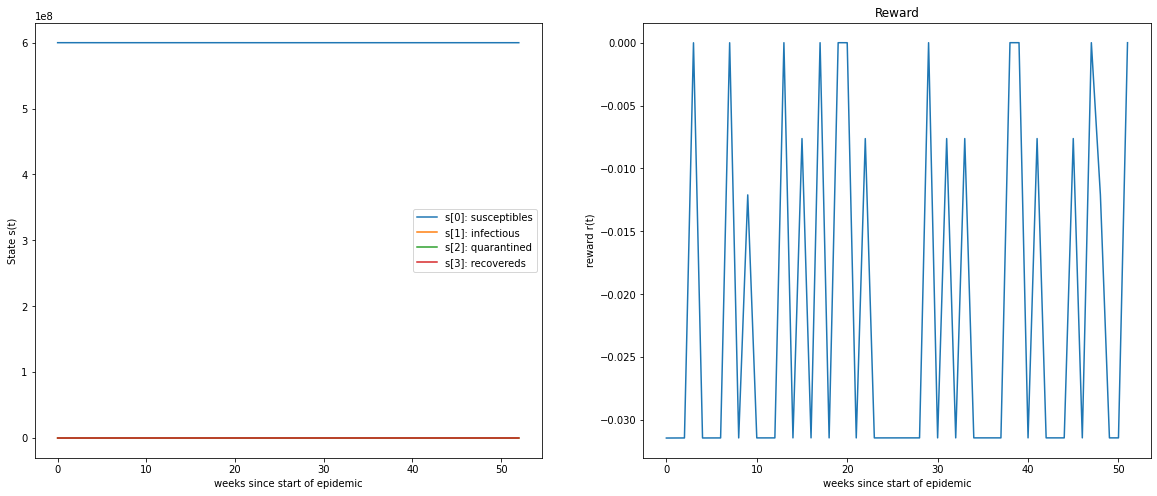

In [ ]:
res,rer = avg_random_rbf(100,test_env) 
agent_p.graphs(res,rer)

Q-Learning with RBF Function Approximation
ProblemID  |        ST0N0        |        ST1N0        |        ST0N1        |        ST1N1        
___________________________________________________________________________________________________
Step 510          | -0.9035329368463216 | -1.8033562756749058 | -1.0912742585395399 | -1.6106057053128369 |
Step 511          | -1.0316468638176721 | -1.7091154124591015 | -1.0191281545642363 | -1.7111443752843243 |
Step 512          | -1.0011967747847321 | -1.766508813958136 | -1.0580854487620521 | -1.7018977813677323 |
Step 513          | -1.0376492333336356 | -1.7927183304850516 | -1.032864225202868 | -1.6713206636182756 |
Step 514          | -1.1502862161936172 | -1.6759997625863412 | -1.0642922630758642 | -1.8443567810058679 |
Step 515          | -1.5517607370143816 | -1.7675616540395205 | -1.288604124832103 | -1.7951688812997302 |
Step 516          | -1.602331634156631 | -1.8162846246469462 | -1.4832940124510114 | -1.7640137098930204 |
Step 

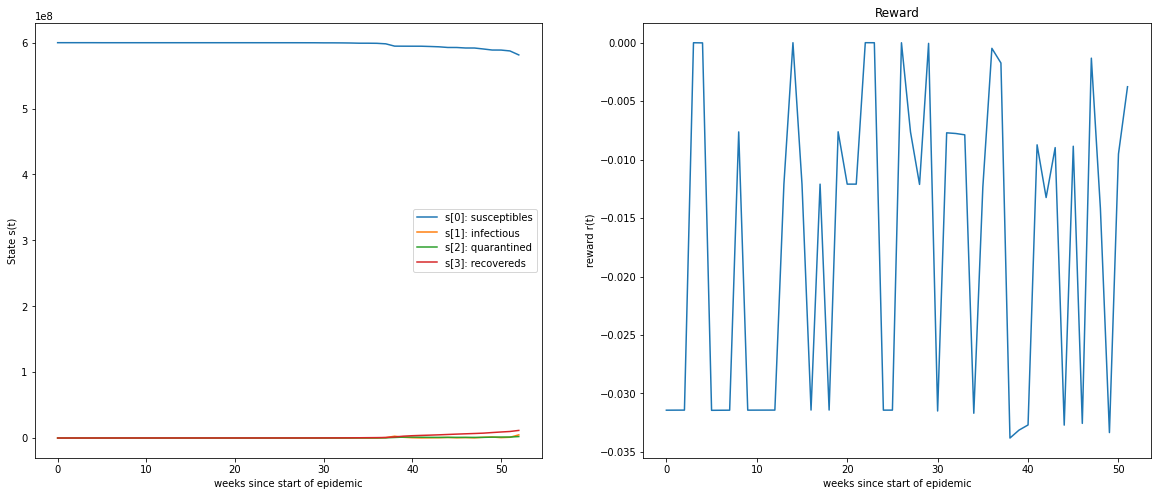

In [89]:
print("Q-Learning with RBF Function Approximation")
print("ProblemID  |        ST0N0        |        ST1N0        |        ST0N1        |        ST1N1        ")
print("___________________________________________________________________________________________________")
for i in range(10):
  test_env = virl.Epidemic(stochastic=False, noisy=False,problem_id=i)
  s0,r0 = avg_random_rbf(100,test_env)
  test_env = virl.Epidemic(stochastic=True, noisy=False,problem_id=i)
  s1,r1 = avg_random_rbf(100,test_env)
  test_env = virl.Epidemic(stochastic=False, noisy=True,problem_id=i)
  res,r2 = avg_random_rbf(100,test_env)
  test_env = virl.Epidemic(stochastic=True, noisy=True,problem_id=i)
  res,r3 = avg_random_rbf(100,test_env)
  print(str(i) + "          | " + str(sum(r0)) + " | "+ str(sum(r1)) + " | "+ str(sum(r2)) + " | "+ str(sum(r3)) + " |")
print("\n")



test_env = virl.Epidemic(stochastic=False, noisy=False)
res,rer = avg_random_rbf(100,test_env) 
agent_p.graphs(res,rer)

Step 51total reward -1.4761195362533885


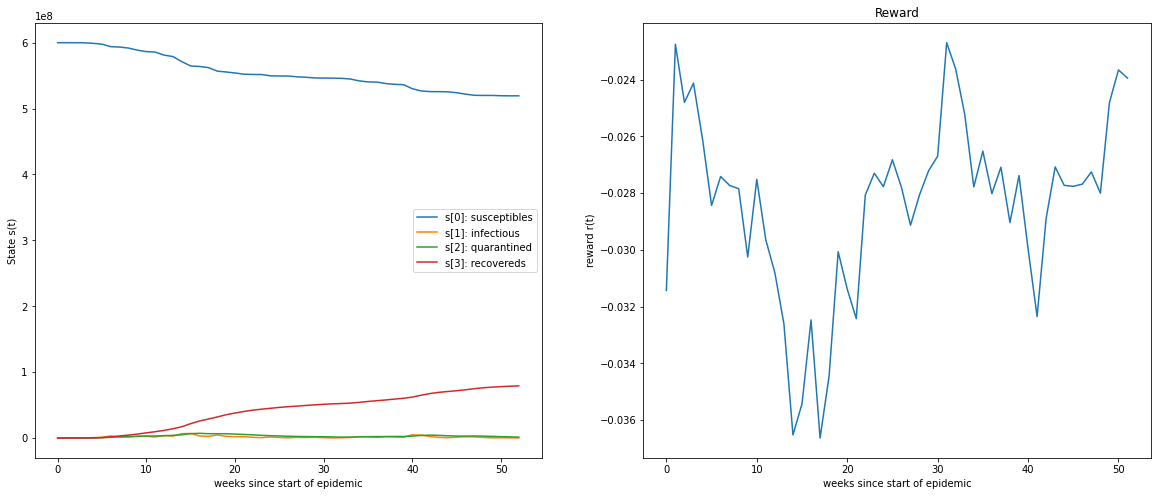

In [ ]:
test_env = virl.Epidemic(stochastic=True, noisy=False)
res,rer = avg_random_rbf(100,test_env) 
agent_p.graphs(res,rer)

Step 51total reward -1.2182441076042057


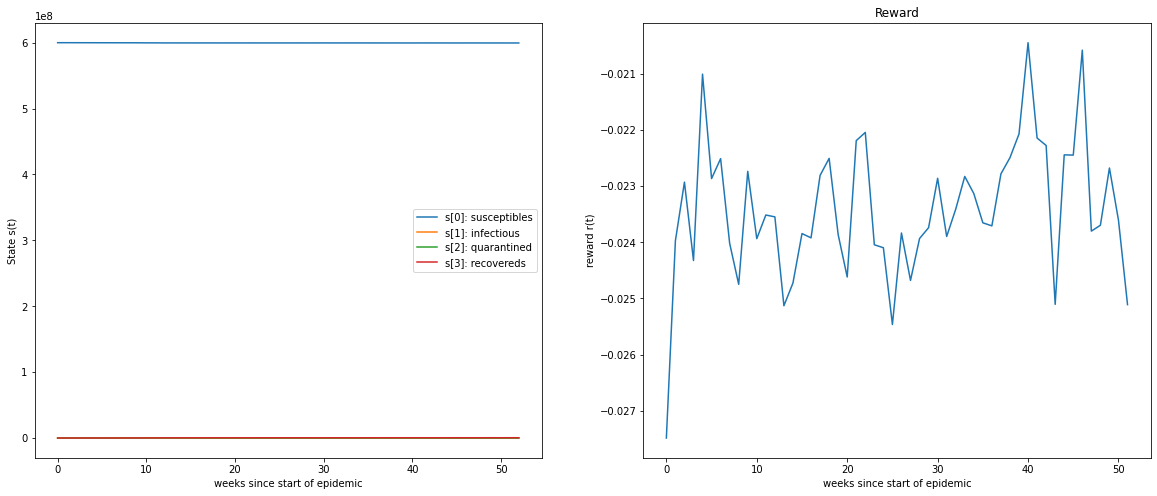

In [ ]:
test_env = virl.Epidemic(stochastic=False, noisy=True)
res,rer = avg_random_rbf(100,test_env) 
agent_p.graphs(res,rer)

Step 51total reward -1.452775104263603


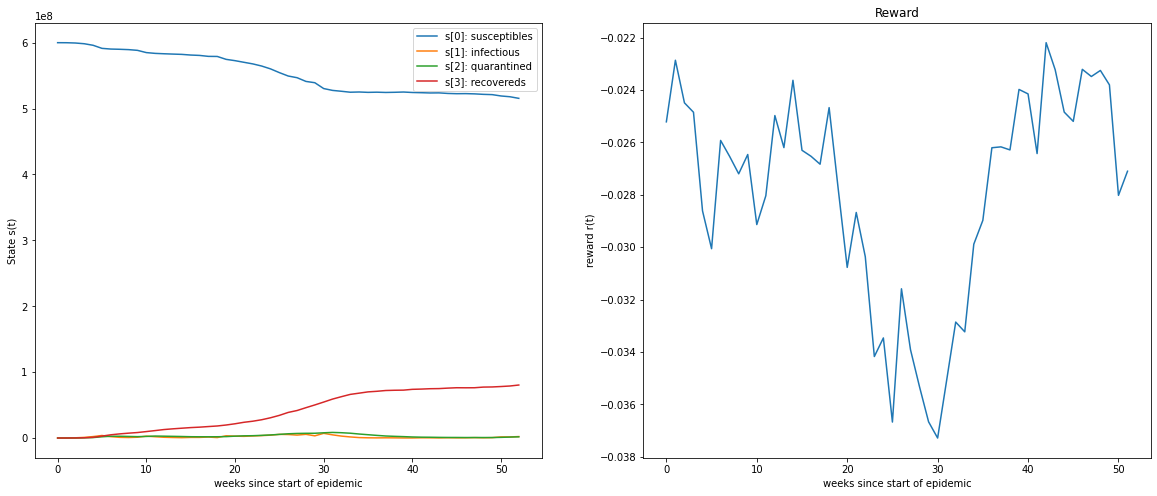

In [ ]:
test_env = virl.Epidemic(stochastic=True, noisy=True)
res,rer = avg_random_rbf(100,test_env) 
agent_f.graphs(res,rer)

In [ ]:
rewardsff=[]
for i in range(10):
  test_env = virl.Epidemic(stochastic=False, noisy=False,problem_id=i)
  s,r = avg_random_rbf(100,test_env) 
  rewardsff.append(sum(r))
print(rewardsff)

rewardstf=[]
for i in range(10):
  test_env = virl.Epidemic(stochastic=True, noisy=False,problem_id=i)
  s,r = avg_random_rbf(100,test_env) 
  rewardstf.append(sum(r))
print(rewardstf)

rewardsft=[]
for i in range(10):
  test_env = virl.Epidemic(stochastic=False, noisy=True,problem_id=i)
  s,r = avg_random_rbf(100,test_env) 
  rewardsft.append(sum(r))
print(rewardsft)

rewardstt=[]
for i in range(10):
  test_env = virl.Epidemic(stochastic=True, noisy=True,problem_id=i)
  s,r = avg_random_rbf(100,test_env) 
  rewardstt.append(sum(r))
print(rewardstt)


Step 51[-1.1067563549470554, -1.3500482767735278, -1.389080221969473, -1.1166472509941683, -1.097010427347368, -1.1755159456457414, -1.2158766685026159, -1.2625472070437442, -1.3142892669953172, -1.365939612567328]
Step 51[-1.4249601691802853, -1.421335971155081, -1.5012403924792308, -1.371140164421987, -1.3609604199230758, -1.419112514577213, -1.4314940425439622, -1.4837250269803592, -1.4724420741122572, -1.4865073813317182]
Step 51[-1.2198592889493243, -1.2209995125846878, -1.2277563791476112, -1.2307281129373664, -1.234018303031138, -1.2353661768353474, -1.281130986534696, -1.316486961548575, -1.3877342134549666, -1.623334173510507]
Step 51[-1.4781839766711011, -1.5605674050082385, -1.553812719997681, -1.5283410302689477, -1.5358237908846986, -1.4969959957523082, -1.5034834562076185, -1.541033261494418, -1.6296377965075322, -1.4696498192843894]
